<h1><b>PREDICTING WINE QUALITY</b></h1>

<h3><b>Importing libraries and reading files</b></h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as m
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

<h3><b>Description</b></h3>
This model predicts if the quality of wine is good or bad when the following input variables are provided:<br/>
<b>Input variables (based on physicochemical tests):</b><br/>
1 - fixed acidity<br/>
2 - volatile acidity<br/>
3 - citric acid<br/>
4 - residual sugar<br/>
5 - chlorides<br/>
6 - free sulfur dioxide<br/>
7 - total sulfur dioxide<br/>
8 - density<br/>
9 - pH<br/>
10 - sulphates<br/>
11 - alcohol<br/>
<b>Output variable (based on sensory data):</b><br/>
12 - quality (either 0 or 1)<br/>
If <b>quality = 1</b>, it is <b>"good"</b> else it is <b>"bad"</b><br/>
The dataset contains "quality" attribute values ranging from 0 to 10, hence if quality>=6, it is considered as GOOD, else it is considered as BAD

In [2]:
df=pd.read_csv("WineQuality.csv")   #reading the file
df.head(20)                                  #displaying the contents of the file

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
df.describe().T                        #mean, median, std on the data

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


<h3><b>Changing 'quality' attribute to binary values</b></h3>

In [4]:
print(df['quality'].head(5))

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64


In [5]:
def func(row):
    if(row['quality']>=6):
        return 1
    else:
        return 0
df['quality']=df.apply(func,axis=1)

In [6]:
print(df['quality'].head(5))

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int64


In [7]:
df['quality'].value_counts()       #counting the number of good and bad quality wines

1    855
0    744
Name: quality, dtype: int64

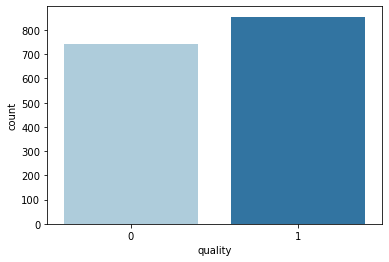

In [8]:
sns.countplot(x='quality', data=df, palette='Paired')    #plotting the bar chart for good and bad quality wines
plt.show()

In [9]:
#Percentages of good and bad wines 
good = len(df[df['quality']==1])
bad = len(df[df['quality']==0])
print("Percentage of good wines: {:.2f}%".format(good/(good+bad)*100))
print("Percentage of bad wines: {:.2f}%".format(bad/(good+bad)*100))

Percentage of good wines: 53.47%
Percentage of bad wines: 46.53%


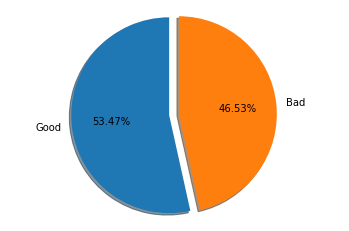

In [10]:
#Using pie chart to represent the bad and good percentages of wine
labels = 'Good','Bad'
s1=len(df[df.quality == 1])
s2=len(df[df.quality == 0])
sizes=[s1,s2]
explode = (0.1, 0)  #portion to be exploded or highlighted
plt.pie(sizes, explode=explode, labels=labels, autopct='%.2f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

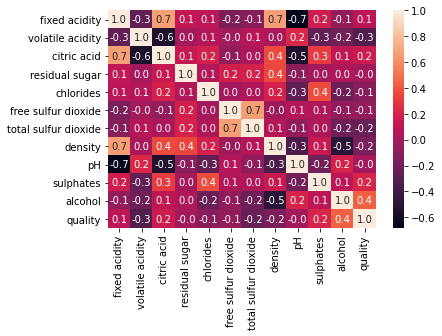

In [11]:
sns.heatmap(df.corr(),annot=True, fmt = '.1f')                            #heatmap of dataset

<h2><b><i>With few attributes dropped</i></b></h2>

In [12]:
df.corr()                                   #using corr() to drop few attributes

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.109494
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.061757
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.218072


In [13]:
cor = df.corr()
cor_target = abs(cor["quality"])                       #setting quality as the target attribute
relevant_features = cor_target[cor_target>0.2]         #selecting attributes which has correlation >0.2 with 'quality' attribute
relevant_features

volatile acidity        0.321441
total sulfur dioxide    0.231963
sulphates               0.218072
alcohol                 0.434751
quality                 1.000000
Name: quality, dtype: float64

In [14]:
#filling the missing values with most frequent values in the column
dict = {'volatile_acidity':df['volatile acidity'],'citric_acid':df['citric acid'],'sulphates':df['sulphates'],'alcohol':df['alcohol'],'quality':df['quality']}
df_filled = pd.DataFrame(dict)
df_filled = df_filled.apply(lambda x:x.fillna(x.value_counts().index[0]))

<h3><b>Linear Regression</b></h3>

<h5><b>Simple Linear Regression</b></h5>

In [15]:
df_filled

,volatile_acidity,citric_acid,sulphates,alcohol,quality
0,0.700,0.00,0.56,9.4,0
1,0.880,0.00,0.68,9.8,0
2,0.760,0.04,0.65,9.8,0
3,0.280,0.56,0.58,9.8,1
4,0.700,0.00,0.56,9.4,0
...,...,...,...,...,...
1594,0.600,0.08,0.58,10.5,0
1595,0.550,0.10,0.76,11.2,1
1596,0.510,0.13,0.75,11.0,1
1597,0.645,0.12,0.71,10.2,0


In [16]:
x = df_filled.iloc[:,3].values       #selecting 'alcohol' as the feature for simple linear regression sine it gave better aaccuracy when compared to other attributes
y = df_filled.iloc[:,4].values       #selecting 'quality' attribute the target attibute

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state = 0)   #Splitting the training and test data
X_train= X_train.reshape(-1, 1)          #reshaping the features as it has only one feature column
Y_train= Y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
Y_test = Y_test.reshape(-1,1)

In [18]:
print(Y_test.shape)

(320, 1)


In [19]:
clf = LinearRegression()                 #clf is the model which uses Linear Regression

In [20]:
clf.fit(X_train, Y_train)

LinearRegression()

In [21]:
print("Intercept:",clf.intercept_)
print("Coefficient:",clf.coef_)

Intercept: [-1.55377968]
Coefficient: [[0.20047931]]


In [22]:
y_pred = clf.predict(X_test)              #Predicting the outcome for test set (based on the trained set)


In [23]:
print(y_pred.shape)

(320, 1)


In [24]:
print("Score:",clf.score(X_test,Y_test))

Score: 0.21764081032267335


In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.4014332119686553
Mean Squared Error: 0.19448960480884792
Root Mean Squared Error: 0.4410097559111906


<h5><b>Multiple Linear Regression</b></h5>

In [26]:
x = df_filled.iloc[:,0:4].values
y = df_filled.iloc[:,4].values

In [27]:
clf = LinearRegression()

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state = 0)   #Splitting the training and test data

In [29]:
clf.fit(X_train, Y_train)

LinearRegression()

In [30]:
print("Intercept:",clf.intercept_)
print("Coefficient:",clf.coef_)

Intercept: -1.1840029836719923
Coefficient: [-0.65826795 -0.1441223   0.40382896  0.17668232]


In [31]:
print("Score:",clf.score(X_test,Y_test))

Score: 0.2847010597426807


In [32]:
pred = clf.predict(X_test)

In [33]:
lin_mae = metrics.mean_absolute_error(Y_test, pred)
print("MAE:",lin_mae)
lin_mse = mean_squared_error(Y_test,pred)
print("MSE:",lin_mse)
lin_rmse = np.sqrt(lin_mse)
print("RMSE:",lin_rmse)
r_squared = metrics.r2_score(Y_test,pred)
print("R-Squared:",r_squared)

MAE: 0.37107522453673936
MSE: 0.17781884592959296
RMSE: 0.42168571938066973
R-Squared: 0.2847010597426807


<h3><b>Logistic Regression</b></h3>

In [34]:
x = df_filled.iloc[:,0:4].values
y = df_filled.iloc[:,4].values

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state = 0)   #Splitting the training and test data
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1279, 4)
(1279,)
(320, 4)
(320,)


In [36]:
#Standard Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [37]:
# creating the model
model = LogisticRegression()

# feeding the training set into the model
model.fit(X_train, Y_train)

# predicting the results for the test set
y_pred = model.predict(X_test)

# calculating the testing accuracies
print("Accuracy : {}%".format(model.score(X_test, Y_test)*100))

# classification report
print("Classification Report:\n",classification_report(Y_test, y_pred))

# confusion matrix
print("Confusion Matrix:\n",confusion_matrix(Y_test, y_pred))

Accuracy : 73.75%
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.73      0.72       148
           1       0.76      0.74      0.75       172

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320

Confusion Matrix:
 [[108  40]
 [ 44 128]]


In [38]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})                 #actual vs predicted quality of wines
df1.head(10)

,Actual,Predicted
0,1,1
1,0,0
2,1,1
3,1,0
4,0,1
5,1,0
6,0,0
7,1,1
8,0,0
9,0,0


<h3><b>Polynomial Regression</b></h3>

In [39]:
x = df_filled.iloc[:,0:4].values
y = df_filled.iloc[:,4].values

In [40]:
#converting the independent variables  with degree of polynomial 3
poly_reg = PolynomialFeatures(degree=3)
x = poly_reg.fit_transform(x)

#feature scaling
sc_X = StandardScaler()
x = sc_X.fit_transform(x)

In [41]:
X_train ,X_test, y_train ,y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [42]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

#predicting the value
y_pred = lin_reg.predict(X_test)

#r2 result
r_squared = r2_score(y_test, y_pred)
print("r_squared = ",r_squared)

r_squared =  0.2904739577978992


<h3><b>Decision Tree Classifier</b></h3>

In [43]:
# creating model
model = DecisionTreeClassifier()

# feeding the training set into the model
model.fit(X_train, Y_train)

# predicting the results for the test set
y_pred = model.predict(X_test)

# calculating the testing accuracies
print("Accuracy : {}%".format(model.score(X_test, Y_test)*100))

Accuracy : 74.0625%


In [44]:
# classification report
print("Classification Report:\n",classification_report(Y_test, y_pred))

# confusion matrix
print("Confusion Matrix:\n",confusion_matrix(Y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71       148
           1       0.75      0.78      0.76       172

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320

Confusion Matrix:
 [[102  46]
 [ 37 135]]


<h3><b>Gaussian (KNN)</b></h3>

In [45]:
nb = GaussianNB()
nb.fit(X_train,Y_train)
nb_predict=np.round_(nb.predict(X_test))

In [46]:
nb_conf_matrix = confusion_matrix(Y_test, nb_predict)
nb_acc_score = accuracy_score(Y_test, nb_predict)
print("Confusion matrix:\n",nb_conf_matrix)
print("Accuracy: {}%".format(nb_acc_score*100))

Confusion matrix:
 [[108  40]
 [ 56 116]]
Accuracy: 70.0%


<h3><b>Random Forest Algorithm</b></h3>

In [47]:
x = df_filled.drop(['quality'],axis=1)
y = df_filled['quality']

In [52]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100,max_depth= 10)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
score = random_forest.score(X_train, y_train)
print("Score:",score)
print("Accuracy: {}%".format(accuracy_score(y_test, Y_pred)*100))
print("Classification Report:\n",classification_report(y_test,Y_pred))

Score: 0.9765441751368257
Accuracy: 80.0%
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78       148
           1       0.81      0.82      0.82       172

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320



<h5><i>On comparing the results, <b>RANDOM FOREST ALGORITHM</b> gives maximum accuracy <b>(80%)</b> when certain attributes are dropped</i></h5>

<h2><b><i>By considering all the attributes</i></b></h2>

In [53]:
df=pd.read_csv("WineQuality.csv")   #reading the file
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [54]:
def func(row):
    if(row['quality']>=6):
        return 1
    else:
        return 0
df['quality']=df.apply(func,axis=1)

In [55]:
dict = {'fixed_acidity':df['fixed acidity'],'volatile_acidity':df['volatile acidity'],'citric_acid':df['citric acid'],'residual_sugar':df['residual sugar'],'chlorides':df['chlorides'],'sulphur_dioxide':df['free sulfur dioxide'],'total_sulphur_dioxide':df['total sulfur dioxide'],'density':df['density'],'pH':df['pH'],'sulphates':df['sulphates'],'alcohol':df['alcohol'],'quality':df['quality']}
df_filled = pd.DataFrame(dict)
df_filled = df_filled.apply(lambda x:x.fillna(x.value_counts().index[0]))

<h3><b>Linear Regression</b></h3>

<h5><b>Multiple Linear Regression</b></h5>

In [56]:
x = df_filled.iloc[:,0:11].values
y = df_filled.iloc[:,11].values

In [57]:
clf = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state = 0)   #Splitting the training and test data
clf.fit(X_train, Y_train)

LinearRegression()

In [58]:
print("Intercept:",clf.intercept_)
print("Coefficient:\n",clf.coef_)

Intercept: 9.522100701775706
Coefficient:
 [ 2.65535606e-02 -5.50363895e-01 -1.93764125e-01  1.28367570e-02
 -8.25632143e-01  3.28737849e-03 -2.95706697e-03 -1.05180941e+01
 -4.67505832e-02  5.30680971e-01  1.48800701e-01]


In [59]:
print("Score:",clf.score(X_test,Y_test))

Score: 0.310837259405775


In [60]:
pred = clf.predict(X_test)

In [61]:
lin_mae = metrics.mean_absolute_error(Y_test, pred)
print("MAE:",lin_mae)
lin_mse = mean_squared_error(Y_test,pred)
print("MSE:",lin_mse)
lin_rmse = np.sqrt(lin_mse)
print("RMSE:",lin_rmse)
r_squared = metrics.r2_score(Y_test,pred)
print("R-Squared:",r_squared)

MAE: 0.3579544372233669
MSE: 0.17132155004459562
RMSE: 0.4139100748285739
R-Squared: 0.310837259405775


<h3><b>Logistic Regression</b></h3>

In [62]:
x = df_filled.drop(['quality'],axis=1)            #selecting all columns except quality
y = df_filled['quality']   

In [63]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size=0.1, random_state=1)        #Training and splitting the dataset
log_reg = LogisticRegression(solver='liblinear',random_state=0)
log_reg.fit(X_Train, Y_Train)

LogisticRegression(random_state=0, solver='liblinear')

In [64]:
y_pred_log = log_reg.predict(X_Test)                         #Prediction of the outcome
pred = np.round_(y_pred_log)

In [65]:
print("Accuracy:",accuracy_score(pred, Y_Test)*100)                #Printing the accuracy of the model

Accuracy: 80.625


In [66]:
cm = confusion_matrix(Y_Test, pred)                    
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[60 12]
 [19 69]]


<i>The above confusion matrix says that there are:<br/>
113 outputs which predicts correctly that wine quality is good (TRUE POSITIVE)<br/>
41 outputs which predicts wrongly that wine quality is good    (FALSE POSITIVE)<br/>
38 outputs which predicts wrongly that wine quality is bad     (FALSE NEGATIVE)<br/>
128 outputs which predicts correctly that wine quality is bad  (TRUE NEGATIVE)</i>

In [67]:
print("Classification Report:\n",classification_report(Y_Test, y_pred_log))

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.83      0.79        72
           1       0.85      0.78      0.82        88

    accuracy                           0.81       160
   macro avg       0.81      0.81      0.81       160
weighted avg       0.81      0.81      0.81       160



<h3><b>Polynomial Regression</b></h3>

In [68]:
x = df_filled.drop(['quality'],axis=1)            #selecting all columns except quality
y = df_filled['quality']  

In [69]:
#converting the independent variables  with degree of polynomial 3
poly_reg = PolynomialFeatures(degree=3)
x = poly_reg.fit_transform(x)
#feature scaling
sc_X = StandardScaler()
x = sc_X.fit_transform(x)

In [70]:
X_train ,X_test, y_train ,y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [71]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

#predicting the value
y_pred = lin_reg.predict(X_test)

#r2 result
r_squared = r2_score(y_test, y_pred)
print("r_squared = ",r_squared)

r_squared =  -0.44354518446391267


<h3><b>Decision Tree Classifier</b></h3>

In [72]:
# creating model
model = DecisionTreeClassifier()

# feeding the training set into the model
model.fit(X_train, Y_train)

# predicting the results for the test set
y_pred = model.predict(X_test)

# calculating the testing accuracies
print("Accuracy : {}%".format(model.score(X_test, Y_test)*100))

Accuracy : 74.6875%


In [73]:
# classification report
print("Classification Report:\n",classification_report(Y_test, y_pred))

# confusion matrix
print("Confusion Matrix:\n",confusion_matrix(Y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72       148
           1       0.75      0.78      0.77       172

    accuracy                           0.75       320
   macro avg       0.75      0.74      0.74       320
weighted avg       0.75      0.75      0.75       320

Confusion Matrix:
 [[104  44]
 [ 37 135]]


<h3><b>Gaussian (KNN)</b></h3>

In [74]:
x = df_filled.drop(['quality'],axis=1)            #selecting all columns except quality
y = df_filled['quality']   

In [75]:
nb = GaussianNB()
nb.fit(X_Train,Y_Train)
nb_predict=np.round_(nb.predict(X_Test))

In [76]:
nb_conf_matrix = confusion_matrix(Y_Test, nb_predict)
nb_acc_score = accuracy_score(Y_Test, nb_predict)
print("Confusion matrix:")
print(nb_conf_matrix)
print("Accuracy: {}%".format(nb_acc_score*100))

Confusion matrix:
[[56 16]
 [21 67]]
Accuracy: 76.875%


<h3><b>Random Forest Algorithm</b></h3>

In [77]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100,max_depth= 10)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
score = random_forest.score(X_train, y_train)
print("Score:",score)
print("Accuracy: {}%".format(accuracy_score(y_test, Y_pred)*100))
print(classification_report(y_test,Y_pred))

Score: 0.9906176700547302
Accuracy: 77.8125%
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       148
           1       0.78      0.81      0.80       172

    accuracy                           0.78       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.78      0.78      0.78       320



<h5><i>On comparing the results, <b>LOGISTIC REGRESSION</b> gives the maximum accuracy <b>(80.625%)</b> when all attributes are considered</i></h5>

<h2><b><i>By dropping two attributes (pH and residual sugar)</i></b></h2>

In [78]:
df=pd.read_csv("WineQuality.csv")   #reading the file
df.head(20)                                  #displaying the contents of the file

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [79]:
def func(row):
    if(row['quality']>=6):
        return 1
    else:
        return 0
df['quality']=df.apply(func,axis=1)

In [80]:
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [81]:
dict = {'fixed_acidity':df['fixed acidity'],'volatile_acidity':df['volatile acidity'],'citric_acid':df['citric acid'],'chlorides':df['chlorides'],'sulphur_dioxide':df['free sulfur dioxide'],'total_sulphur_dioxide':df['total sulfur dioxide'],'density':df['density'],'sulphates':df['sulphates'],'alcohol':df['alcohol'],'quality':df['quality']}
df_filled = pd.DataFrame(dict)
df_filled = df_filled.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [82]:
x = df_filled.iloc[:,0:9].values
y = df_filled.iloc[:,9].values

In [83]:
print(x.shape)
print(y.shape)

(1599, 9)
(1599,)


In [84]:
clf = LinearRegression()

In [85]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size=0.2, random_state = 0)   #Splitting the training and test data

In [86]:
clf.fit(X_Train, Y_Train)

LinearRegression()

In [87]:
print("Score:",clf.score(X_Test,Y_Test))

Score: 0.3130738694825873


In [88]:
pred = clf.predict(X_Test)

In [89]:
lin_mae = metrics.mean_absolute_error(Y_Test, pred)
print("MAE:",lin_mae)
lin_mse = mean_squared_error(Y_Test,pred)
print("MSE:",lin_mse)
lin_rmse = np.sqrt(lin_mse)
print("RMSE:",lin_rmse)
r_squared = metrics.r2_score(Y_Test,pred)
print("R-Squared:",r_squared)

MAE: 0.357490087924389
MSE: 0.17076554275831307
RMSE: 0.4132378767227335
R-Squared: 0.3130738694825873


<h3><b>Logistic Regression</b></h3>

In [90]:
x = df_filled.drop(['quality'],axis=1)            #selecting all columns except quality
y = df_filled['quality']   

In [91]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size=0.2, random_state=1)        #Training and splitting the dataset
log_reg = LogisticRegression(solver='liblinear',random_state=0)
log_reg.fit(X_Train, Y_Train)

LogisticRegression(random_state=0, solver='liblinear')

In [92]:
y_pred_log = log_reg.predict(X_Test)                         #Prediction of the outcome
pred = np.round_(y_pred_log)

In [93]:
print("Accuracy:",accuracy_score(pred, Y_Test)*100)                #Printing the accuracy of the model

Accuracy: 75.625


In [94]:
cm = confusion_matrix(Y_Test, pred)                    
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[116  38]
 [ 40 126]]


In [95]:
print("Classification Report:\n",classification_report(Y_Test, y_pred_log))

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.75      0.75       154
           1       0.77      0.76      0.76       166

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320



<h3><b>Polynomial Regression</b></h3>

In [96]:
x = df_filled.drop(['quality'],axis=1)            #selecting all columns except quality
y = df_filled['quality']  

In [97]:
#converting the independent variables  with degree of polynomial 3
poly_reg = PolynomialFeatures(degree=3)
x = poly_reg.fit_transform(x)
#feature scaling
sc_X = StandardScaler()
x = sc_X.fit_transform(x)

In [98]:
X_Train ,X_Test, Y_Train ,Y_Test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [99]:
lin_reg=LinearRegression()
lin_reg.fit(X_Train,Y_Train)

#predicting the value
y_pred = lin_reg.predict(X_Test)

#r2 result
r_squared = r2_score(Y_Test, y_pred)
print("r_squared = ",r_squared)

r_squared =  0.24550097633569734


<h3><b>Decision Tree Classifier</b></h3>

In [101]:
# creating model
model = DecisionTreeClassifier()

# feeding the training set into the model
model.fit(X_Train, Y_Train)

# predicting the results for the test set
y_pred = model.predict(X_Test)

# calculating the testing accuracies
print("Accuracy : {}%".format(model.score(X_Test, Y_Test)*100))

Accuracy : 72.8125%


In [102]:
# classification report
print("Classification Report:\n",classification_report(Y_Test, y_pred))

# confusion matrix
print("Confusion Matrix:\n",confusion_matrix(Y_Test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.71       148
           1       0.75      0.74      0.75       172

    accuracy                           0.73       320
   macro avg       0.73      0.73      0.73       320
weighted avg       0.73      0.73      0.73       320

Confusion Matrix:
 [[105  43]
 [ 44 128]]


<h3><b>Gaussian (KNN)</b></h3>

In [103]:
x = df_filled.drop(['quality'],axis=1)            #selecting all columns except quality
y = df_filled['quality']   

In [104]:
nb = GaussianNB()
nb.fit(X_Train,Y_Train)
nb_predict=np.round_(nb.predict(X_Test))

In [105]:
nb_conf_matrix = confusion_matrix(Y_Test, nb_predict)
nb_acc_score = accuracy_score(Y_Test, nb_predict)
print("Confusion matrix:")
print(nb_conf_matrix)
print("Accuracy: {}%".format(nb_acc_score*100))

Confusion matrix:
[[ 44 104]
 [ 20 152]]
Accuracy: 61.25000000000001%


<h3><b>Random Forest Algorithm</b></h3>

In [106]:
dict = {'fixed_acidity':df['fixed acidity'],'volatile_acidity':df['volatile acidity'],'citric_acid':df['citric acid'],'chlorides':df['chlorides'],'sulphur_dioxide':df['free sulfur dioxide'],'total_sulphur_dioxide':df['total sulfur dioxide'],'density':df['density'],'sulphates':df['sulphates'],'alcohol':df['alcohol'],'quality':df['quality']}
df_filled = pd.DataFrame(dict)
df_filled = df_filled.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [107]:
x = df_filled.drop(['quality'],axis=1)            #selecting all columns except quality
y = df_filled['quality']   

In [108]:
X_Train ,X_Test, Y_Train ,Y_Test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [110]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100,max_depth= 10)
random_forest.fit(X_Train, Y_Train)
Y_pred = random_forest.predict(X_Test)
score = random_forest.score(X_Train, Y_Train)
print("Score:",score)
print("Accuracy: {}%".format(accuracy_score(Y_Test, Y_pred)*100))
print(classification_report(Y_Test,Y_pred))

Score: 0.9843627834245504
Accuracy: 82.1875%
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       148
           1       0.84      0.83      0.83       172

    accuracy                           0.82       320
   macro avg       0.82      0.82      0.82       320
weighted avg       0.82      0.82      0.82       320



In [111]:
X_Test.shape

(320, 9)

<h5><i>On comparing the results, <b>RANDOM FOREST ALGORITHM</b> gives the maximum accuracy <b>(82.1875%)</b> when all attributes, except pH and residual sugar, are considered.</i></h5>

<h4><i>Hence, when the overall performance is considered, <b>RANDOM FOREST ALGORITHM</b> (when pH and residual sugar attributes are dropped) gives the maximum accuracy of <b>82.1875%</b></i></h4>

<h3><b>Testing the model having highest accuracy with random values</b></h3>

In [112]:
sample = np.array([[6, 0.31, 0.47, 0.067, 18, 42, 0.99549, 0.66, 11],[7.4, 0.7, 0, 0.076, 11, 34, 0.9978, 0.56, 9.4],[7.8, 0.76, 0.04, 0.092, 15, 54, 0.997, 0.65, 9.8],[5.9, 0.55, 0.1, 0.062, 39.0, 51, 0.99512, 0.76, 11.2]])
output = random_forest.predict(sample)
for i in range(len(output)):
    if (output[i]==0):
        print("Quality of wine sample {} is BAD ({})".format((i+1),output[i]))
    elif(output[i]==1):
        print("Quality of wine sample {} is GOOD ({})".format((i+1),output[i]))

Quality of wine sample 1 is GOOD (1)
Quality of wine sample 2 is BAD (0)
Quality of wine sample 3 is BAD (0)
Quality of wine sample 4 is GOOD (1)
